# Data visualization tutorial

In this tutorial we will cover basic plotting in python. Specifically we will discuss different types of plots, plot elements, and how to create them. For more advanced plotting, see the next tutorial.

In [1]:
## Import necessary packages

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

## Creating visualizations in Python

There are many packages we could use to generate plots in python. Below are a few of the most common:

- matplotlib
- seaborn
- ggplot2
- plotly
- pandas

When making a basic chart, such as a scatterplot, one could use any of these packages. Why choose one over the other?

1) Data format: Perhaps you have your data already stored as a pandas data frame. In that case, the pandas package makes it very straightforward to visualize the data.

2) Syntax preference: If you have already learned how to plot in Matlab, then matplotlib and seaborn will be easy to pick up as they have very similar approaches to plotting. If coming from R or if you are familiar with the grammar of graphics, you'll likely find ggplot2 to be the most welcoming.

3) Style: The default colors and axis styles of each package differ. You can always tweak these features, but if you can use the default style to get close to your desired output, it makes the coding much quicker.



-------
## Today

We'll use a few different small datasets to demonstrate the plotting functions in seaborn. 



In [2]:
## Random data 1D

# Create an array with n random numbers
n = 20
data1 = np.random.rand(n)
#-- Hint: Keep increasing n to see how the histogram in the next block changes

# Print the data
print(data1)


[0.25446201 0.90509886 0.96975862 0.0838753  0.98544456 0.48079763
 0.706833   0.69632614 0.42482261 0.14000265 0.11690741 0.88300791
 0.18064117 0.97434125 0.10775646 0.05756814 0.113174   0.23619411
 0.56980583 0.13410615]


[Text(0, 0.5, 'data values'), Text(0.5, 0, 'Our data :)')]

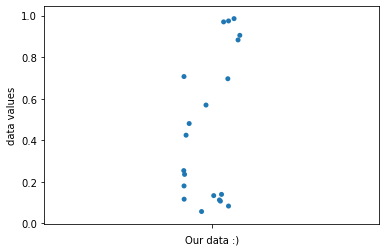

In [3]:
# How can we visually understand a long vector of values?

# Stripplot
fig1 = sns.stripplot(data1, orient="v")
fig1.set(ylabel="data values", xlabel="Our data :)")

[(-3, 3), Text(0.5, 1.0, 'Box plot')]

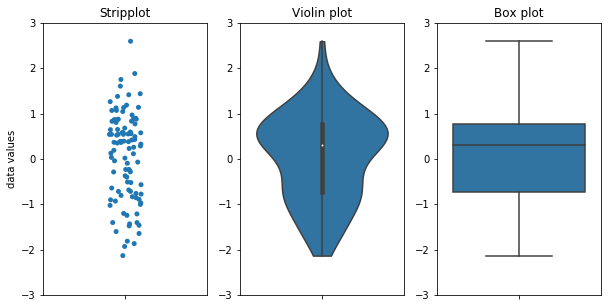

In [6]:
# Boxplot vs violin plot
data2 = np.random.normal(size=100)
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
fig2a = sns.stripplot(data2, orient = "v")
fig2a.set(ylim=(-3,3), ylabel="data values", title="Stripplot")

plt.subplot(1,3,2)
fig2b = sns.violinplot(data2, orient = "v", cut=0)
fig2b.set(ylim=(-3,3), title="Violin plot")

plt.subplot(1,3,3)
fig2c = sns.boxplot(data2, orient="v")
fig2c.set(ylim=(-3,3), title="Box plot")

#-- Hint: How do these plots change with different distributions? Try replacing data2 with data3, and 
# set data3 = np.random.lognormal(size=100)-2

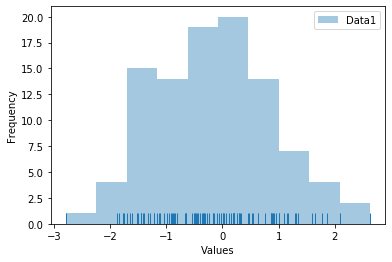

In [7]:
# Histogram - sns.distplot
data2 = np.random.normal(size=100)
fig1 = sns.distplot(data2, label="Data1", bins=10, kde=False, rug=True)

#-- Hint: try adding the following terms to the function: kde=True, rug=True, color="red", bins=n/10

# Set axis labels
fig1.set(xlabel = "Values", ylabel="Frequency")

#-- Hint: try adding a vertical line at the mean value by uncommenting the following line...
# fig1.axvline(data1.mean(), label = 'Mean', color = "blue")

# Make sure we show the legend as well. Anything that we give a label should show up here
fig1.legend()

### Plotting with two variables

When we have two variables, the plotting possibilities become a little more interesting. We might show a line plot, a scatter plot, a bar plot, or more depending on the data. For example, if the data are collected over time, a line plot will help us see how the observations change from one timepoint to the next. 


In [8]:
## Spurious correlation data

years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
letters = np.array([8, 11, 12, 11, 13, 12, 9, 9, 7, 9]);
eggconsumption = np.array([251, 252, 255, 255, 257, 256, 258, 250, 247, 246.1])

# What types of variables are these? Categorical or numerical?

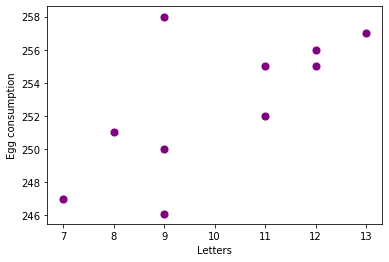

In [9]:
## Scatterplot

# Perhaps the most frequent method for understanding two variables is through the scatterplot
fig2 = sns.scatterplot(letters, eggconsumption, color="purple", s=80)
fig2.set(xlabel="Letters", ylabel = "Egg consumption");

The above scatterplot works well for many datasets. However in our case we have a timepoint associated with each dot. That means we can do one of two things: Create a line plot and link subsequent timepoints, or create two line plots with a double y-axis.
Let's try both. What do you learn from the single line plot? What do you learn from the double y-axis plot?


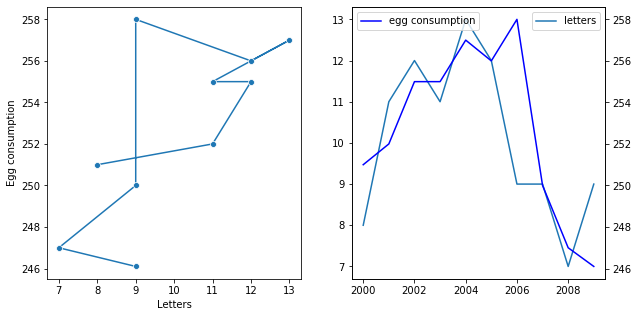

In [10]:
# We'll use subplots to make this work. In one figure, we might have multiple subplots arranged in a type of grid (or not!)
# Subplots help us more easily make comparisons between plots.

plt.figure(figsize=(10,5))

# Line plot
plt.subplot(1,2,1)   # Draw the following plot in a grid that contains 1 row and 2 columns, in the 1st position

sns.lineplot(letters, eggconsumption, ci=None, sort=False, estimator = None, marker = "o")    # The data are already ordered by year
plt.xlabel("Letters")
plt.ylabel("Egg consumption")

# Double y-axis
plt.subplot(1,2,2)
sns.lineplot(years, letters, label="letters")
ax2 = plt.twinx()
sns.lineplot(years, eggconsumption, color="b", ax=ax2, label="egg consumption")


### What are these plots missing????


### Matrices and heatmaps

Depending on your system, you might often need to visualize an entire matrix of data. In neuroscience, this can happen if you study areas of the brain and how they all connect to each other. In biology, we might use matrices to describe protein-protein interactions. In transportation, matrices could store flow between multiple areas (think of airports and planes). 

Below we'll work with random data to understand the basics. If you'd like to take a peek at some brain data collected from healthy adults and how we might visually represent these data, see the advanced notebook.

In [11]:
n = 5
data_matrix = np.random.random((n,n))

# To make this matrix a little easier to understand, let's symmetrize it
data_matrix = data_matrix + np.transpose(data_matrix)

print(f'Our matrix has size: {data_matrix.shape}')
data_matrix

Our matrix has size: (5, 5)


array([[1.80696246, 0.98993081, 0.68558352, 0.82654646, 1.03113547],
       [0.98993081, 0.85394829, 0.96605856, 1.1339783 , 1.77622777],
       [0.68558352, 0.96605856, 1.43484575, 0.79752957, 1.12206543],
       [0.82654646, 1.1339783 , 0.79752957, 1.77117238, 1.49396102],
       [1.03113547, 1.77622777, 1.12206543, 1.49396102, 0.18985803]])

[Text(33.0, 0.5, 'Rows'), Text(0.5, 15.0, 'Columns')]

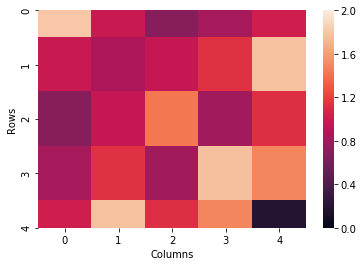

In [12]:
# Heatmap
fig5 = sns.heatmap(data_matrix, vmin=0, vmax = 2)
fig5.set(xlabel="Columns", ylabel="Rows")

Now let's imagine we have just imaged someone's brain. Our initial data processing gives us 83 regions (motor cortext left hemisphere, motor cortext right hemisphere, ..., brainstem) and the thickness of the wiring that connect them.

![DTI data](./data/brain.png)


Below we'll load in a brain matrix from a healthy adult and plot it using sns.heatmap.



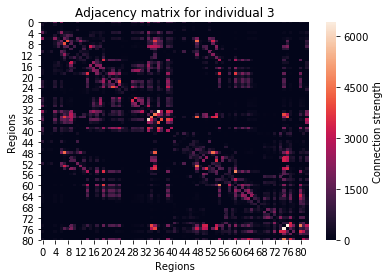

In [13]:
# Load in one scan as brain_example. 
brain_example = sio.loadmat("data/brain_3.mat")

# The brain_example has the adjacency matrix stored as 'adj'
brain_example = brain_example['adj']

# Data processing: symmetrize and set diagonal to 0
brain_example = 0.5*(brain_example + np.transpose(brain_example))
np.fill_diagonal(brain_example,0)

# Look at the adjacency matrix

# With seaborn
fig_0 = sns.heatmap(brain_example, cbar_kws={'label': 'Connection strength'})
fig_0.set(xlabel = 'Regions', ylabel = 'Regions', title = "Adjacency matrix for individual 3");
